# L2: Text classification

Text classification is the task of sorting text documents into predefined classes. The concrete problem you will be working on in this lab is the classification of texts with respect to their political affiliation. The specific texts you are going to classify are speeches held in the [Riksdag](https://www.riksdagen.se/en/), the Swedish national legislature.

## Data set

The raw data for this lab comes from [The Riksdag’s Open Data](https://data.riksdagen.se/in-english/). We have tokenized the speeches and put them into two compressed [JSON](https://en.wikipedia.org/wiki/JSON) files:

* `speeches-201718.json.bz2` (speeches from the 2017/2018 parliamentary session)
* `speeches-201819.json.bz2` (ditto, from the 2018/2019 session)

We start by loading these files into two separate data frames.

In [1]:
import pandas as pd
import bz2

with bz2.open('speeches-201718.json.bz2') as source:
    speeches_201718 = pd.read_json(source)

with bz2.open('speeches-201819.json.bz2') as source:
    speeches_201819 = pd.read_json(source)

When you inspect the two data frames, you can see that there are three labelled columns: `id` (the official speech ID), `words` (the space-separated words of the speech), and `party` (the party of the speaker, represented by its customary abbreviation).

In [2]:
speeches_201718.head()

,id,words,party
0,H5-002-004,eders majestäter eders kungliga högheter herr ...,S
1,H5-003-001,aktuell debatt om situationen för ensamkommand...,V
2,H5-003-002,herr talman och ledamöter jag vill börja med a...,S
3,H5-003-003,herr talman åhörare den här debatten handlar a...,M
4,H5-003-004,herr talman ansvar och rättssäkerhet är två or...,SD


Throughout the lab, we will be using the speeches from 2017/2018 as our training data, and the speeches from 2018/2019 as our test data.

In [3]:
training_data, test_data = speeches_201718, speeches_201819

In [4]:
test_data.head()

,id,words,party
0,H6-001-001,hälsningsanförande från ålderspresidenten ärad...,M
1,H6-001-002,fru ålderspresident ärade ledamöter av sverige...,S
2,H6-001-003,fru ålderspresident ärade ledamöter av sverige...,M
3,H6-001-004,val av förste vice talman val av andre vice ta...,S
4,H6-001-005,ärade fru ålderspresident och likaledes ärade ...,SD


For later reference, we store the sorted list of party abbreviations.

In [5]:
parties = sorted(training_data['party'].unique())
print(parties)

['C', 'KD', 'L', 'M', 'MP', 'S', 'SD', 'V']


## Problem 1: Visualization

Your first task is to get to know the data better by producing a simple visualization.

If you are not familiar with the Swedish political system and the parties represented in the Riksdag in particular, then we suggest that you have a look at the Wikipedia article about the [2018 Swedish general election](https://en.wikipedia.org/wiki/2018_Swedish_general_election).

For the lab, we ask you to compare the two data frames with respect to the distribution of the speeches over the different parties. Write code to generate two bar plots that visualize this information, one for the 2017/2018 speeches and one for the 2018/2019 speeches. Inspect the two plots, and compare them

* to each other
* to the results of the 2014 and the 2018 general elections

Summarize your observations in a short text in the cell below.

**Tip:** If you need help with creating bar plots, [Bar Plot using Pandas](https://dfrieds.com/data-visualizations/bar-plot-python-pandas) provides a useful tutorial.

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

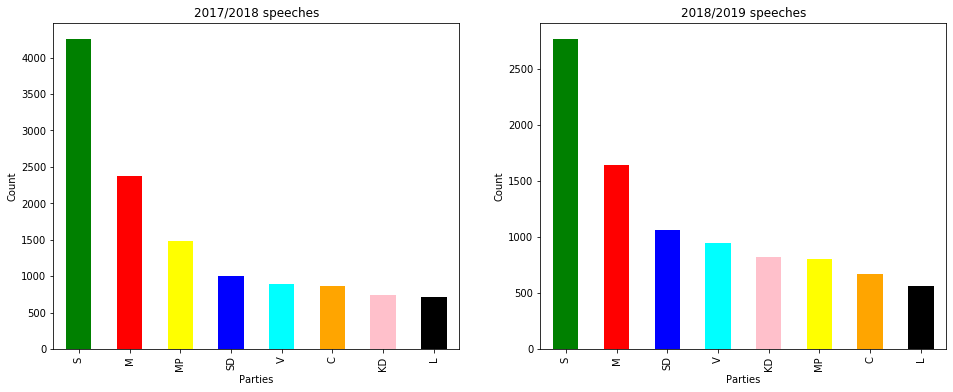

In [7]:
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
training_data['party'].value_counts().plot(kind='bar',color=['green', 'red', 'yellow', 'blue', 'cyan','orange','pink','black'])
plt.xlabel("Parties")
plt.ylabel("Count")
plt.title("2017/2018 speeches")
plt.subplot(1,2,2)
test_data['party'].value_counts().plot(kind='bar',color=['green', 'red', 'blue', 'cyan', 'pink','yellow','orange','black'])
plt.xlabel("Parties")
plt.ylabel("Count")
plt.title("2018/2019 speeches")
y2 = test_data['party'].value_counts()

From the above two visualizations, we can observe that number of speeches made by each parties in 2017/2018 have twice the amount of data. Also, the main thing to observe here is that the classes are <b>imbalanced.</b>

## Problem 2: Naive Bayes classifier

You are now ready to train and evaluate a classifier. More specifically, we ask you to train a [Multinomial Naive Bayes](https://scikit-learn.org/stable/modules/naive_bayes.html#multinomial-naive-bayes) classifier. You will have to

1. vectorize the speeches in the training data
2. instantiate and fit the Naive Bayes model
3. evaluate the model on the test data

The scikit-learn library provides a convenience class [Pipeline](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) that allows you to solve the first two tasks with very compact code. For the evaluation you can use the function [`classification_report`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html), which will report per-class precision, recall and F1, as well as overall accuracy.

In [8]:
# TODO: Write code here to train and evaluate a Multinomial Naive Bayes classifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

x_train = training_data['words']
y_train = training_data['party']
x_test = test_data['words']
y_test = test_data['party']

pipe = Pipeline([('count_vect',CountVectorizer()),
                ('tfidf_transformer',TfidfTransformer()),
                ('nbClassifier',MultinomialNB())])

pipe.fit(x_train,y_train)

print("################# Training ###################")
prediction_train = pipe.predict(x_train)
print(classification_report(y_train, prediction_train, target_names=parties))

print("################# Testing ###################")
prediction_test = pipe.predict(x_test)
print(classification_report(y_test, prediction_test, target_names=parties))

################# Training ###################


/Users/lawrence/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           C       0.00      0.00      0.00       865
          KD       0.00      0.00      0.00       743
           L       0.00      0.00      0.00       719
           M       0.97      0.01      0.03      2370
          MP       0.00      0.00      0.00      1481
           S       0.35      1.00      0.51      4261
          SD       0.00      0.00      0.00      1010
           V       0.00      0.00      0.00       894

    accuracy                           0.35     12343
   macro avg       0.16      0.13      0.07     12343
weighted avg       0.31      0.35      0.18     12343

################# Testing ###################
              precision    recall  f1-score   support

           C       0.00      0.00      0.00       671
          KD       0.00      0.00      0.00       821
           L       0.00      0.00      0.00       560
           M       0.50      0.00      0.00      1644
          MP       0.00      0.0

/Users/lawrence/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Would you have expected the results that you got?

35% accuracy on train, 30% accuracy on test. This is the expected result because the data is imbalanced. Running a classifier on an imbalanced dataset leads to have less accuracy. In order to increase the accuracy or performance of the classifier we need to apply sampling techniques.

## Problem 3: Baselines

Evaluation metrics such as accuracy should not be understood as absolute measures of performance, but should be used only to compare different classifiers. When other classifiers are not available, a simple baseline is a classifier that generates predictions by random sampling, respecting the training set&rsquo;s class distribution. This baseline is implemented by the class [DummyClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyClassifier.html). What is the performance of the random baseline on the test data?

In [9]:
# TODO: Write code here to evaluate the random baseline
from sklearn.dummy import DummyClassifier
dummy_clf = DummyClassifier(strategy="stratified")
dummy_clf.fit(x_train, y_train)

predicted_train_dummy = dummy_clf.predict(x_train)
print('We got an accuracy of train data using dummy classifier: ',round(np.mean(predicted_train_dummy == y_train)*100,2))

predicted_test_dummy = dummy_clf.predict(x_test)
print('We got an accuracy of test data using dummy classifier: ',round(np.mean(predicted_test_dummy == y_test)*100,2))

We got an accuracy of train data using dummy classifier:  19.85
We got an accuracy of test data using dummy classifier:  17.65


The random baseline classifier has poor performance on test data and train data when compared with Naive Bayes (Multinomial) classifier. Hence We got an accuracy of test data using dummy classifier:  17.62%

An even dumber baseline is to predict, for every document, that class which appears most often in the training data. This baseline is also called the most frequent class baseline. What is the accuracy of that baseline on the test data?

In [10]:
# TODO: Write code here to print the accuracy of the most frequent class baseline
from sklearn.dummy import DummyClassifier
dummy_clf_2 = DummyClassifier(strategy="most_frequent")
dummy_clf_2.fit(x_train, y_train)

predicted_train_dummy_2 = dummy_clf_2.predict(x_train)
print('We got an accuracy of train data using dummy classifier: ',round(np.mean(predicted_train_dummy_2 == y_train)*100,2))

predicted_test_dummy_2 = dummy_clf_2.predict(x_test)
print('We got an accuracy of test data using dummy classifier: ',round(np.mean(predicted_test_dummy_2 == y_test)*100,2))

We got an accuracy of train data using dummy classifier:  34.52
We got an accuracy of test data using dummy classifier:  29.86


We got an accuracy of test data using dummy classifier:  29.86%

## Problem 4: Creating a balanced data set

As you saw in Problem&nbsp;1, the distribution of the speeches over the eight different parties (classes) is imbalanced. One technique used to alleviate this is **undersampling**, in which one randomly removes samples from over-represented classes until all classes are represented with the same number of samples.

Implement undersampling to create a balanced subset of the training data. Rerun the evaluation from Problem&nbsp;2 on the balanced data and compare the results. Discuss your findings in a short text. Would you argue that undersampling make sense for the task of predicting the party of a speaker?

**Hint:** Your balanced subset should consist of 5,752 speeches.

In [11]:
# TODO: Write code here to implement undersampling
from sklearn.utils import resample

min_amount = min(training_data['party'].value_counts())

df_list = []
for i in parties:
    df_list.append(training_data[training_data.party == i])

#Source: https://elitedatascience.com/imbalanced-classes
def undersample(x, n = min_amount):
    new = resample(x, replace = False, n_samples = n)
    return new

balanced_data = []
for i in df_list:
    balanced_data.append(undersample(i))
    
balanced_data = pd.concat(balanced_data)
balanced_data['party'].value_counts()

x_train_balanced = balanced_data['words']
y_train_balanced = balanced_data['party']

pipe.fit(x_train_balanced, y_train_balanced)

print("################# Training ###################")
prediction_train = pipe.predict(x_train_balanced)
print(classification_report(y_train_balanced, prediction_train, target_names=parties))

print("################# Testing ###################")
prediction_test = pipe.predict(x_test)
print(classification_report(y_test, prediction_test, target_names=parties))

################# Training ###################
              precision    recall  f1-score   support

           C       0.94      0.95      0.95       719
          KD       0.86      0.98      0.91       719
           L       0.96      0.95      0.96       719
           M       0.86      0.95      0.90       719
          MP       0.96      0.83      0.89       719
           S       0.98      0.88      0.93       719
          SD       0.97      0.90      0.93       719
           V       0.88      0.93      0.90       719

    accuracy                           0.92      5752
   macro avg       0.93      0.92      0.92      5752
weighted avg       0.93      0.92      0.92      5752

################# Testing ###################
              precision    recall  f1-score   support

           C       0.27      0.44      0.33       671
          KD       0.23      0.45      0.30       821
           L       0.30      0.41      0.34       560
           M       0.39      0.46      

From the accuracies, we could say that it is overfitting. By performing undersampling and having the target labels evenly distributed, it generalizes well on training data yielding 91% accuracy, but the classifier does not generalizes well on test data yielding only 37%. Also, limitation of undersampling is that, it deletes useful information from the data.

## Problem 5: Confusion matrix

A **confusion matrix** is a specific table that is useful when analysing the performance of a classifier. In this table, both the rows and the columns correspond to classes, and each cell $(i, j)$ states how many times a sample with gold-standard class $i$ was predicted as belonging to class $j$.

In scitkit-learn, the confusion matrix of a classifier is computed by the function [`confusion_matrix`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html). If you would rather see a visual representation, you can also use [`plot_confusion_matrix`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html).

Your task is to use the confusion matrix in order to find, for each given party $p$ in the Riksdag, that other party $p'$ which the classifier that you trained in Problem&nbsp;4 most often confuses with $p$ when it predicts the party of a speaker.

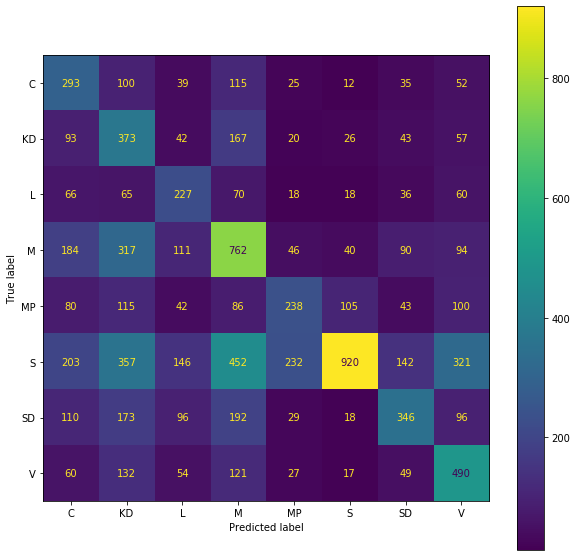

[[293 100  39 115  25  12  35  52]
 [ 93 373  42 167  20  26  43  57]
 [ 66  65 227  70  18  18  36  60]
 [184 317 111 762  46  40  90  94]
 [ 80 115  42  86 238 105  43 100]
 [203 357 146 452 232 920 142 321]
 [110 173  96 192  29  18 346  96]
 [ 60 132  54 121  27  17  49 490]]


In [12]:
# TODO: Write code here to solve Problem 5
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
fig, ax = plt.subplots(figsize=(10, 10))
plot_confusion_matrix(pipe, x_test, y_test,ax=ax,values_format='d')
plt.show()

cm = confusion_matrix(y_test,prediction_test)
print(cm)

In [13]:
len(cm[0])

8

In [14]:
len(parties)

8

In [15]:
cm[0][1]

100

In [16]:
print("Most often confused list")
print("===========================")
for i in range(len(parties)):
    temp_value = 0
    temp_index = 0
    for j in range(len(cm[i])):
        if(i != j):
            if(temp_value<cm[i][j]):
                temp_value = cm[i][j]
                temp_index = j
    print(parties[i],":",parties[temp_index]," occurred","\t",temp_value)

Most often confused list
C : M  occurred 	 115
KD : M  occurred 	 167
L : M  occurred 	 70
M : KD  occurred 	 317
MP : KD  occurred 	 115
S : M  occurred 	 452
SD : M  occurred 	 192
V : KD  occurred 	 132


Take a minute to reflect on the question whether your results make sense.

From the above confusion matrix and most often confused list, it is clearer that there is a higher misclassification rate. Among this misclassification rate, out 8 parties, 5 parties are confused with party M, two with party KD and one with party V.

## Problem 6: Grid search

Until now, you have been using the vectorizer and the Naive Bayes classifier with their default hyperparameters. When working with real-world applications, you would want to find settings for the hyperparameters that maximize the performance for the task at hand.

Manually tweaking the hyperparameters of the various components of a vectorizer–classifier pipeline can be cumbersome. However, scikit-learn makes it possible to run an exhaustive search for the best hyperparameters over a grid of possible values. This method is known as **grid search**.

The hyperparameters of a pipeline should never be tuned on the final test set. (Why would that be a bad idea?) Instead, one should either use a separate validation set, or run cross-validation over different folds. Here we will use cross-validation.

Implement a grid search with 5-fold cross-validation to find the optimal parameters in a grid defined by the following choices for the hyperparameters:

* In the vectorizer, try a set-of-words model in addition to the default bag-of-words model (two possible parameter values).
* Also in the vectorizer, try extracting bigrams in addition to unigrams (two possible parameter values).
* In the Naive Bayes classifier, try using additive smoothing with $\alpha \in \{1, 0{.}1\}$ (two possible parameter values).

Use the class [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) from the scikit-learn library. Print the results of your best model, along with the parameter values that yielded these results.

In [17]:
# TODO: Write code here to implement the grid search
from sklearn.model_selection import GridSearchCV
#Source : https://scikit-learn.org/stable/tutorial/text_analytics/working_with_text_data.html
parameters = {
    'count_vect__binary': [True, False],
    'count_vect__ngram_range': [(1, 1), (1, 2)],
    'nbClassifier__alpha': (1, 0.1),
}

gridCv = GridSearchCV(pipe, parameters, cv=5)
gridCv.fit(x_train_balanced, y_train_balanced)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('count_vect', CountVectorizer()),
                                       ('tfidf_transformer',
                                        TfidfTransformer()),
                                       ('nbClassifier', MultinomialNB())]),
             param_grid={'count_vect__binary': [True, False],
                         'count_vect__ngram_range': [(1, 1), (1, 2)],
                         'nbClassifier__alpha': (1, 0.1)})

In [18]:
print(gridCv.best_params_)

{'count_vect__binary': True, 'count_vect__ngram_range': (1, 2), 'nbClassifier__alpha': 0.1}


In [19]:
pipe = Pipeline([('count_vect',CountVectorizer(binary=True,ngram_range=(1,2))),
                ('tfidf_transformer',TfidfTransformer()),
                ('nbClassifier',MultinomialNB(alpha=0.1))])

pipe.fit(x_train_balanced, y_train_balanced)

print("################# Training ###################")
prediction_train = pipe.predict(x_train)
print(classification_report(y_train, prediction_train, target_names=parties))

print("################# Testing ###################")
prediction_test = pipe.predict(x_test)
print(classification_report(y_test, prediction_test, target_names=parties))

################# Training ###################
              precision    recall  f1-score   support

           C       0.69      0.94      0.80       865
          KD       0.60      0.99      0.75       743
           L       0.73      1.00      0.84       719
           M       0.77      0.77      0.77      2370
          MP       0.80      0.77      0.78      1481
           S       0.96      0.64      0.77      4261
          SD       0.84      0.90      0.87      1010
           V       0.66      0.94      0.78       894

    accuracy                           0.79     12343
   macro avg       0.76      0.87      0.79     12343
weighted avg       0.82      0.79      0.78     12343

################# Testing ###################
              precision    recall  f1-score   support

           C       0.32      0.46      0.38       671
          KD       0.29      0.44      0.35       821
           L       0.33      0.42      0.37       560
           M       0.44      0.49      

## Problem 7: Try to improve your results

Scikit-learn makes it easy to test different vectorizer–classifier pipelines – among other things, it includes different types of logistic regression classifiers, support vector machines, and decision trees. Browse the library to see which methods are supported.

Build a pipeline that you find interesting, and use grid search to find optimal settings for the hyperparameters. Print the results of your best model. Did you manage to get better results than the ones that you obtained in Problem&nbsp;6? Answer with a short text.

In [20]:
# TODO: Write code here to search for a better model
# source : https://scikit-learn.org/stable/tutorial/text_analytics/working_with_text_data.html
from sklearn.linear_model import SGDClassifier
pipe_2 = Pipeline([
    ('count_vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('svm', SGDClassifier()),
])

parameters = {
    'count_vect__binary': [True, False],
    'count_vect__ngram_range': [(1, 1), (1, 2)],
    'svm__alpha': (1.0, 0.1)
}

gridCv_2 = GridSearchCV(pipe_2, parameters, cv=5)
gridCv_2.fit(x_train_balanced, y_train_balanced)

print(gridCv_2.best_params_)

{'count_vect__binary': False, 'count_vect__ngram_range': (1, 1), 'svm__alpha': 0.1}


In [21]:
pipe_2 = Pipeline([
    ('count_vect', CountVectorizer(binary=True,ngram_range=(1,1))),
    ('tfidf', TfidfTransformer()),
    ('svm', SGDClassifier(alpha=0.1)),
])

pipe_2.fit(x_train_balanced, y_train_balanced)

print("################# Training ###################")
prediction_train = pipe_2.predict(x_train_balanced)
print(classification_report(y_train_balanced, prediction_train, target_names=parties))

print("################# Testing ###################")
prediction_test = pipe_2.predict(x_test)
print(classification_report(y_test, prediction_test, target_names=parties))

################# Training ###################
              precision    recall  f1-score   support

           C       0.71      0.70      0.71       719
          KD       0.94      0.35      0.51       719
           L       0.96      0.17      0.29       719
           M       0.97      0.16      0.27       719
          MP       0.76      0.54      0.63       719
           S       0.97      0.20      0.33       719
          SD       0.19      1.00      0.32       719
           V       0.93      0.11      0.20       719

    accuracy                           0.40      5752
   macro avg       0.80      0.40      0.41      5752
weighted avg       0.80      0.40      0.41      5752

################# Testing ###################
              precision    recall  f1-score   support

           C       0.30      0.37      0.33       671
          KD       0.54      0.08      0.14       821
           L       0.55      0.05      0.09       560
           M       0.77      0.04      

We ran the linear SVM on the train data and test data and found from the classification report that, it is underperforming or its performance is poorer when compared with the classifier in problem 6. So, in our view, Problem 6 classifier is best for this data.

<div class="alert alert-info">
    Please read the section ‘General information’ on the ‘Labs’ page of the course website before submitting this notebook!
</div>